## Welcome to Jupyter Notebook, use CTRL+Enter to run each cell

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os,json,random

In [7]:
# Writting a path to
train_path = "datasets/EuroSATallBands/train.csv"
val_path = "datasets/EuroSATallBands/validation.csv"
test_path = "datasets/EuroSATallBands/test.csv"

In [6]:
#Checking that your dataset exist or not
!ls datasets/

EuroSAT  EuroSATallBands


In [14]:
#Read Training data from CSV file
train_df = pd.read_csv(train_path)

#Read Validation data from CSV file
val_df = pd.read_csv(val_path)


In [13]:
train_df.head()

,Filename,Label,ClassName
0,PermanentCrop/PermanentCrop_2401.tif,6,PermanentCrop
1,PermanentCrop/PermanentCrop_1006.tif,6,PermanentCrop
2,HerbaceousVegetation/HerbaceousVegetation_1025...,2,HerbaceousVegetation
3,SeaLake/SeaLake_1439.tif,9,SeaLake
4,River/River_1052.tif,8,River


In [15]:
test_df = pd.read_csv(test_path)
test_df.head()

,Filename,Label,ClassName
0,HerbaceousVegetation/HerbaceousVegetation_2000...,2,HerbaceousVegetation
1,HerbaceousVegetation/HerbaceousVegetation_514.tif,2,HerbaceousVegetation
2,Residential/Residential_597.tif,7,Residential
3,River/River_2122.tif,8,River
4,SeaLake/SeaLake_2747.tif,9,SeaLake


In [21]:
with open("datasets/EuroSATallBands/label_map.json","r") as file: 
    class_name_encoded = json.load(file)
class_name_encoded
class_names = list(class_name_encoded.keys())

In [22]:
class_names

['AnnualCrop',
 'Forest',
 'HerbaceousVegetation',
 'Highway',
 'Industrial',
 'Pasture',
 'PermanentCrop',
 'Residential',
 'River',
 'SeaLake']

In [23]:
train_label_uniq, train_labels_count = np.unique(train_df['Label'], return_counts=True)

In [28]:
train_count_df = pd.DataFrame(data=train_labels_count)
train_count_df['ClassName'] = class_names
train_count_df.columns = ['Count', 'ClassName']
train_count_df.set_index('ClassName',inplace=True)
train_count_df


,Count
ClassName,
AnnualCrop,2100
Forest,2100
HerbaceousVegetation,2100
Highway,1750
Industrial,1750
Pasture,1400
PermanentCrop,1750
Residential,2100
River,1750


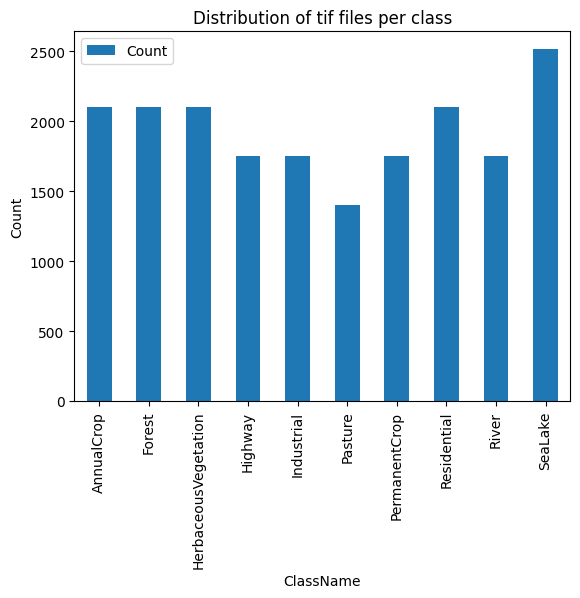

In [30]:
train_count_df.plot.bar()
plt.title("Distribution of tif files per class")
plt.ylabel("Count");

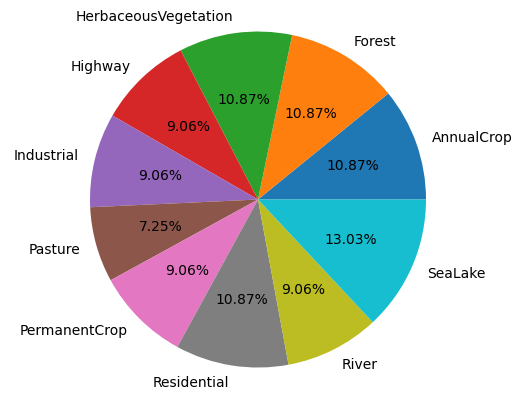

In [31]:
plt.pie(train_count_df.Count,
       explode = (0,0,0,0,0,0,0,0,0,0),
       labels = class_names,
       autopct="%1.2f%%")

plt.axis('equal');